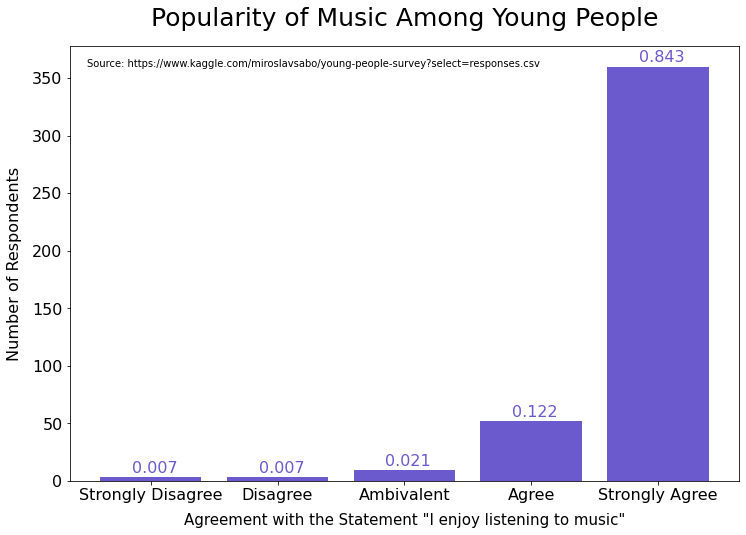

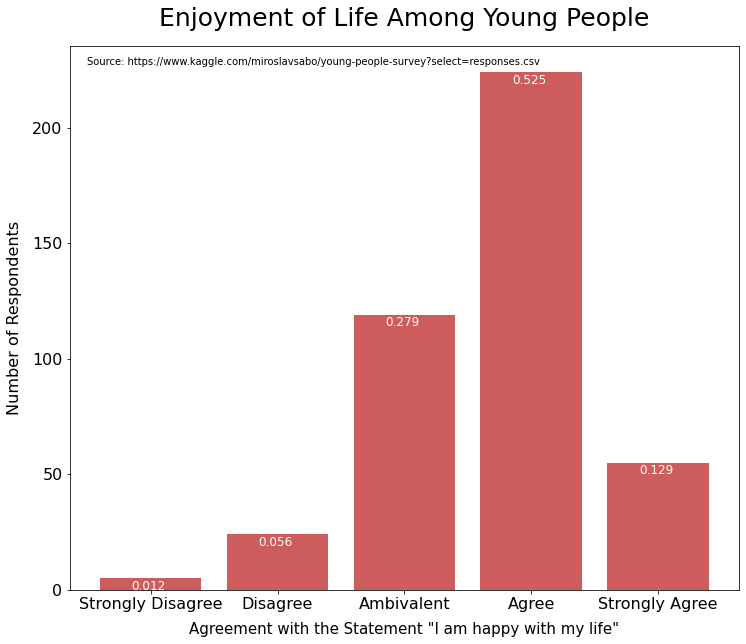

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/Greta/Downloads/responses.csv')
#This allows me to access the dataset
teens = df['Age'] <= 20
df = df[teens]
df = df.dropna()
#limiting the analysis to teenagers

#Creating the first bar chart used in the introduction
music = list(df['Music'])
music1 = music.count(1.0)
music2 = music.count(2.0)
music3 = music.count(3.0)
music4 = music.count(4.0)
music5 = music.count(5.0)
musics = [music1, music2, music3, music4, music5]
#This gives me the amount of respondents that selected each option

#a histogram was not used here because the values are technically categorical
#establishing the x-values on the plot
values = ["Strongly Disagree", "Disagree", "Ambivalent", "Agree", "Strongly Agree"]
#creating the bar chart
fig, axs1 = plt.subplots(figsize=(12,8))      
axs1.bar(values, musics, color=('slateblue'))     
axs1.set_title('Popularity of Music Among Young People', fontsize = 25, pad = 20)   
axs1.set_xlabel('Agreement with the Statement "I enjoy listening to music"', fontsize=15, labelpad = 10)
axs1.set_ylabel('Number of Respondents', fontsize=16, labelpad = 10)
axs1.tick_params(labelsize=16, grid_alpha = 0)
axs1.text(-0.5,360,'Source: https://www.kaggle.com/miroslavsabo/young-people-survey?select=responses.csv')
#creating and applying the decimal labels
for i in range(len(values)):
    val = round(musics[i]/len(music),3)
    plt.text(i-0.15, musics[i] + 4, val, color='slateblue', size=16)
plt.grid(axis='y')
plt.show()

#Creating the second bar chart used in the introduction
happiness = list(df['Happiness in life'])
hap1 = happiness.count(1.0)
hap2 = happiness.count(2.0)
hap3 = happiness.count(3.0)
hap4 = happiness.count(4.0)
hap5 = happiness.count(5.0)
haps = [hap1, hap2, hap3, hap4, hap5]
#This gives me the amount of respondents that selected each option

#again, no histogram bc the variable is categorical
#establishing the x-values on the plot
values = ["Strongly Disagree", "Disagree", "Ambivalent", "Agree", "Strongly Agree"]
#creating the bar chart
fig, axs2 = plt.subplots(figsize=(12,10))      
axs2.bar(values, haps, color=('indianred'))     
axs2.set_title('Enjoyment of Life Among Young People', fontsize = 25, pad = 20)   
axs2.set_xlabel('Agreement with the Statement "I am happy with my life"', fontsize=15, labelpad = 10)
axs2.set_ylabel('Number of Respondents', fontsize=16, labelpad = 10)
axs2.tick_params(labelsize=16, grid_alpha = 0)
axs2.text(-0.5,227,'Source: https://www.kaggle.com/miroslavsabo/young-people-survey?select=responses.csv')
#creating and applying the decimal labels
for i in range(len(values)):
    val = round(haps[i]/len(happiness),3)
    plt.text(i-0.15, haps[i] - 5, val, color='white', size=12)
plt.grid(axis='y')
plt.show()

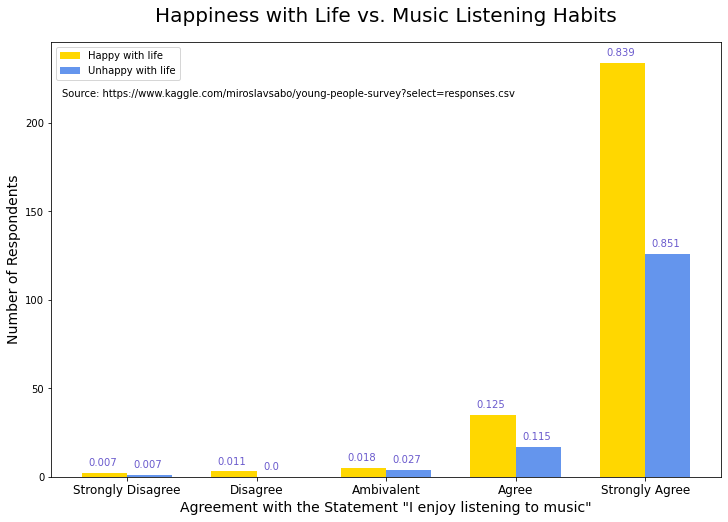

In [264]:
#establishing categories for happiness and upbeatness using the standards established in the paper
happy = df['Happiness in life'] >= 4
unhappy = df['Happiness in life'] <= 3
df_happy = df[happy]
df_unhappy = df[unhappy]
upbeat = df['Slow songs or fast songs'] >= 4
downbeat = df['Slow songs or fast songs'] <= 3
df_upbeat = df[upbeat]
df_downbeat = df[downbeat]
#creating lists that will allow me to complete the first comparison of means
#determining how many responses there were in each category
happymusic = list(df_happy['Music'])
happymusic1 = happymusic.count(1.0)
happymusic2 = happymusic.count(2.0)
happymusic3 = happymusic.count(3.0)
happymusic4 = happymusic.count(4.0)
happymusic5 = happymusic.count(5.0)
happymusics = [happymusic1, happymusic2, happymusic3, happymusic4, happymusic5]
unhappymusic = list(df_unhappy['Music'])
unhappymusic1 = unhappymusic.count(1.0)
unhappymusic2 = unhappymusic.count(2.0)
unhappymusic3 = unhappymusic.count(3.0)
unhappymusic4 = unhappymusic.count(4.0)
unhappymusic5 = unhappymusic.count(5.0)
unhappymusics = [unhappymusic1, unhappymusic2, unhappymusic3, unhappymusic4, unhappymusic5]
#establishing x-labels
labels = ["Strongly Disagree", "Disagree", "Ambivalent", "Agree", "Strongly Agree"]
#creating a grouped bar chart used to compare the spread of the two variables
y_value1 = happymusics
y_value2 = unhappymusics
x = np.arange(len(labels))
width = 0.35 
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x - width/2, y_value1, width, label='Happy with life', color='gold')
ax.bar(x + width/2, y_value2, width, label='Unhappy with life', color='cornflowerblue')
ax.set_ylabel('Number of Respondents', fontsize=14)
ax.set_xlabel('Agreement with the Statement "I enjoy listening to music"', fontsize=14)
ax.set_title('Happiness with Life vs. Music Listening Habits',fontsize=20, pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.text(-0.5,215,'Source: https://www.kaggle.com/miroslavsabo/young-people-survey?select=responses.csv')
ax.legend(loc = 'best')
#creating and applying the decimal values
for i in range(5):
    val = round(happymusics[i]/len(happymusic),3)
    plt.text(i-0.3, happymusics[i] + 4, val, color='slateblue', size=10)
for i in range(5):
    val = round(unhappymusics[i]/len(unhappymusic),3)
    plt.text(i + 0.05, unhappymusics[i] + 4, val, color='slateblue', size=10)
plt.show()


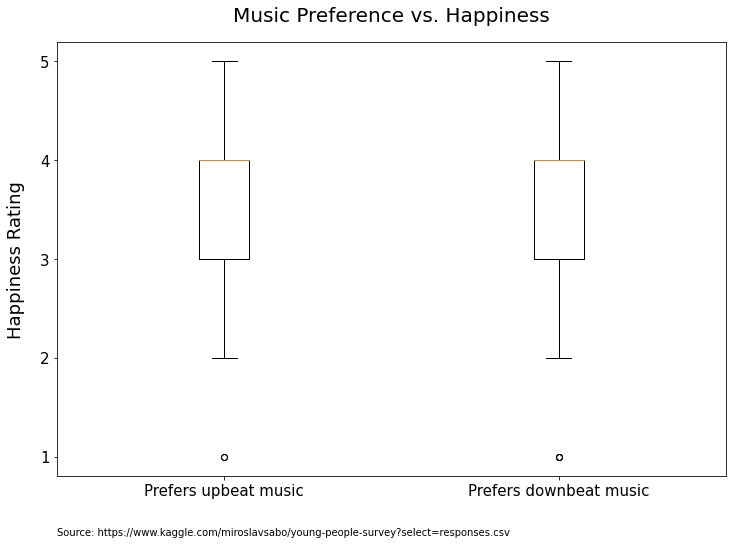

In [265]:
from scipy import stats
#distinguishing the happiness levels of those who listen to upbeat music from that of those who listen to downbeat music
happinessupbeat = list(df_upbeat['Happiness in life'])
happinessdownbeat = list(df_downbeat['Happiness in life'])
#creating a grouped boxplot using this information
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([happinessupbeat, happinessdownbeat])
plt.title('Music Preference vs. Happiness', fontsize=20, pad = 20)
axs.set_xticklabels(["Prefers upbeat music", "Prefers downbeat music"])
axs.set_ylabel('Happiness Rating', fontsize=18, labelpad = 15)
axs.tick_params(labelsize=15)
plt.locator_params(axis='y', nbins=6)
axs.set_yticklabels(labels = [' ', 1, 2, 3, 4, 5])
axs.text(0.5,0.2,'Source: https://www.kaggle.com/miroslavsabo/young-people-survey?select=responses.csv')
plt.show()

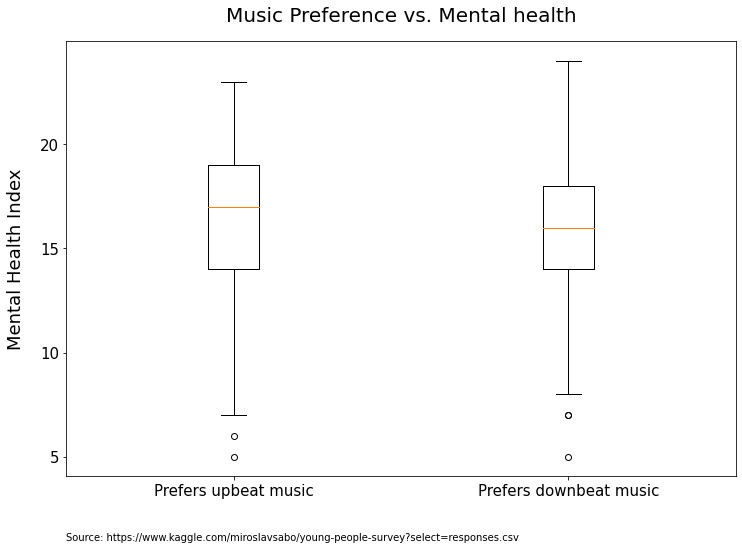

In [266]:
#creating the "mental health index" category by changing the scale on certain values and then combining them
def change(row):
    return 6 - row['Mood swings']
df["Mood swings 2"] = df.apply(change, axis = 1)
def change2(row):
    return 6 - row['Loneliness']
df["Loneliness 2"] = df.apply(change2, axis = 1)
def change3(row):
    return 6 - row['Getting angry']
df["Getting angry 2"] = df.apply(change3, axis = 1)
def mhi(row):
    return row["Happiness in life"] + row["Mood swings 2"] + row["Loneliness 2"] + row["Getting angry 2"] + row["Energy levels"]
df["Mental health index"] = df.apply(mhi, axis = 1)
#redefining the upbeat/downbeat categories so these new changes can be applied
upbeat = df['Slow songs or fast songs'] >= 4
downbeat = df['Slow songs or fast songs'] <= 3
df_upbeat = df[upbeat]
df_downbeat = df[downbeat]
mhupbeat = list(df_upbeat['Mental health index'])
mhdownbeat = list(df_downbeat['Mental health index'])
#creating another grouped boxplot featuring this new variable
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([mhupbeat, mhdownbeat])
plt.title('Music Preference vs. Mental health', fontsize=20, pad = 20)
axs.set_xticklabels(["Prefers upbeat music", "Prefers downbeat music"])
axs.set_ylabel('Mental Health Index', fontsize=18, labelpad = 15)
axs.tick_params(labelsize=15)
plt.locator_params(axis='y', nbins=5)
axs.text(0.5,1,'Source: https://www.kaggle.com/miroslavsabo/young-people-survey?select=responses.csv')
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Mental health index   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.205
Date:                 Wed, 23 Dec 2020   Prob (F-statistic):              0.273
Time:                         22:36:12   Log-Likelihood:                -1123.7
No. Observations:                  427   AIC:                             2251.
Df Residuals:                      425   BIC:                             2259.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3533      0.717     21.419      0.000      13.944      16.762
x1             0.2355      0.215      1.098      0.273      -0.186       0.657
==============================================================================
Omnibus:                       12.485   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.857
Skew:                          -0.386   Prob(JB):                      0.00162
Kurtosis:                       3.355   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation coefficient: 0.05316766517008084
p-value: 0.2729867013722806


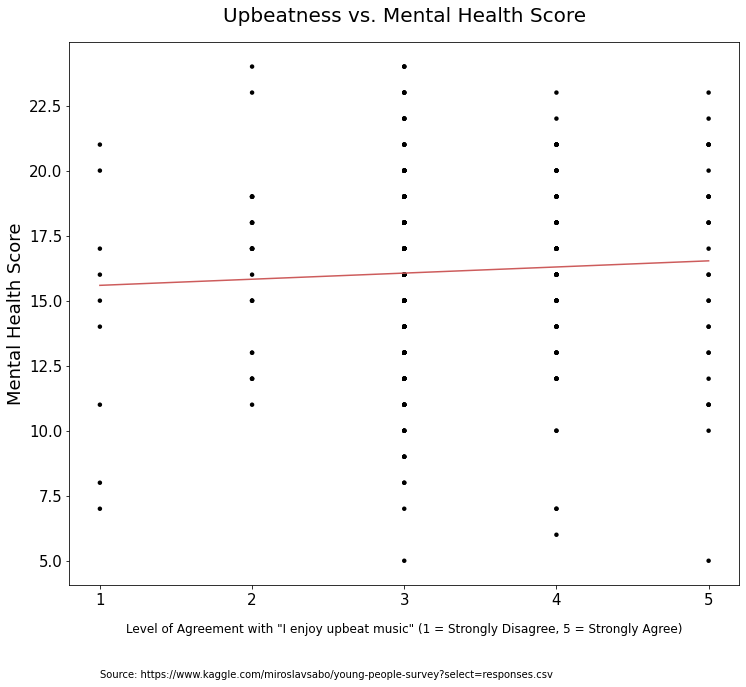

In [267]:
!pip install statsmodels --user
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

#establishing the variables to be used in the linear regression
x_vals = df['Slow songs or fast songs'].values
y_vals = df['Mental health index']

#performing a regression analysis using statsmodels
reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())
#determining the correlation coefficient
corr = stats.pearsonr(df['Slow songs or fast songs'], df['Mental health index'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])
#setting up the conditions that allow for a regression line to be plotted
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(df['Slow songs or fast songs']), np.max(df['Slow songs or fast songs']), 100)
#creating a scatterplot with a regression line
fig, axs = plt.subplots(figsize=(12,10))
axs.scatter(df['Slow songs or fast songs'], df['Mental health index'], c='black', edgecolors='none', s=20)
plt.title("Upbeatness vs. Mental Health Score", fontsize=20, pad = 20)
axs.set_xlabel('Level of Agreement with "I enjoy upbeat music" (1 = Strongly Disagree, 5 = Strongly Agree)', fontsize=12, labelpad = 15)
axs.set_ylabel("Mental Health Score", fontsize=18)
axs.tick_params(labelsize=15)
plt.locator_params(axis='x', nbins=5)
axs.text(1,0.5,'Source: https://www.kaggle.com/miroslavsabo/young-people-survey?select=responses.csv')
axs.plot(x_plot, x_plot*b1 + b0, color='indianred')
plt.show()

Music    Pop  Rock  All
Happy                  
Happy     89   190  279
Unhappy   34   114  148
All      123   304  427
chi2: 3.7574561678121854
p: 0.43982448699528265
dof: 4
expected: [[ 80.3676815 198.6323185 279.       ]
 [ 42.6323185 105.3676815 148.       ]
 [123.        304.        427.       ]]
Music      Pop  Rock  All
Healthy                  
Healthy     49   105  154
Unhealthy   74   199  273
All        123   304  427
chi2: 1.0659449174773312
p: 0.8996370951310536
dof: 4
expected: [[ 44.36065574 109.63934426 154.        ]
 [ 78.63934426 194.36065574 273.        ]
 [123.         304.         427.        ]]
Sample proportion is: 0.6533957845433255
95% CI is: (0.6082572746449765, 0.6985342944416745)
Sample proportion is: 0.36065573770491804
95% CI is: (0.315109139822376, 0.4062023355874601)
Sample proportion is: 0.28805620608899296
95% CI is: (0.24510220672776867, 0.33101020545021725)
Sample proportion is: 0.711943793911007
95% CI is: (0.6689897945497827, 0.7548977932722314)
